In [7]:
import torch

pc_data = torch.load("./eval-results/airplanes_6k.pth")

In [8]:
pc_data.shape

torch.Size([400, 6144, 3])

In [11]:
test_data = pc_data[0,...]

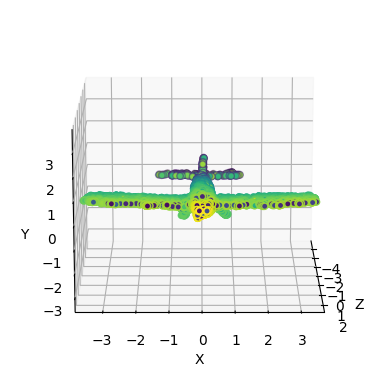

In [12]:
from visuals.visuals_util import visualize_pointcloud
fig = visualize_pointcloud(test_data)

In [14]:
test_data = test_data.detach().cpu().numpy()

In [26]:
np.min(test_data), np.max(test_data)

(-2.7574267, 2.39375)

In [27]:
(test_data - np.mean(test_data)) / np.std(test_data)

array([[ 1.1771137 , -0.86844677, -1.0196205 ],
       [ 1.1745952 , -0.95720714, -0.9809529 ],
       [ 1.1941456 , -0.8497419 , -1.1035346 ],
       ...,
       [ 1.34927   , -2.333705  ,  0.73139775],
       [ 1.09946   , -2.0616553 ,  0.80824745],
       [ 0.49823135,  2.253839  ,  0.9043132 ]], dtype=float32)

In [15]:
import open3d as o3d
# Convert to Open3D PointCloud format
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(test_data)

# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.5, max_nn=512))

# Surface reconstruction using Ball Pivoting
radii = [0.05, 0.1, 0.25, 0.5]
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector(radii))

# Visualize the mesh
o3d.io.write_triangle_mesh("output_mesh.ply", mesh)

True

In [30]:
import open3d as o3d
import numpy as np

# Convert to Open3D PointCloud format
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(test_data)

# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.5, max_nn=512))

# Normalize normals to ensure they are unit vectors, which is a requirement for Poisson reconstruction
pcd.normalize_normals()

# Poisson surface reconstruction
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    poisson_mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=2)

# Optionally: Remove low density vertices
# Convert densities to a numpy array
"""
densities = np.asarray(densities)

# Choose a density threshold
density_threshold = 0.01

# Find the vertex indices that meet the density threshold
vertices_to_remove = densities < density_threshold

# Remove vertices with densities below the threshold
density_mesh = poisson_mesh.select_by_index(
    np.where(vertices_to_remove)[0], invert=True
)
"""
# Visualize the mesh
o3d.visualization.draw_geometries([poisson_mesh])

# Save the mesh
o3d.io.write_triangle_mesh("output_poisson_mesh.ply", poisson_mesh)

[Open3D DEBUG] Input Points / Samples: 6144 / 14
[Open3D DEBUG] #   Got kernel density: 4.100799560546875e-05 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Open3D DEBUG] #     Got normal field: 5.1975250244140625e-05 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 9.274972e-04 / 5.698543e+00
[Open3D DEBUG] #       Finalized tree: 0.003454923629760742 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0009839534759521484 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Open3D DEBUG] #Set point constraints: 8.797645568847656e-05 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 3536 / 4040 / 1
[Open3D DEBUG] Memory Usage: 5223.312 MB
[Open3D DEBUG] # Linear system solved: 0.0018379688262939453 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Open3D DEBUG] Got average: 0.00034999847412109375 (s), 5223.3125 (MB) / 5223.3125 (MB) / 5223 (MB)
[Ope

[WARNING] /root/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.Evaluation.inl (Line 155)
          _getValues
          getValue assumes leaf node
[WARNING] /root/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.Evaluation.inl (Line 155)
          _getValues
          getValue assumes leaf node
[WARNING] /root/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.Evaluation.inl (Line 155)
          _getValues
          getValue assumes leaf node
[WARNING] /root/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.Evaluation.inl (Line 155)
          _getValues
          getValue assumes leaf node
[WARNING] /root/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.Evaluation.inl (Line 155)
          _getValues
          getValue assumes leaf node
[WARNING] /root/Open3D/build/poisson/src/ext_poisson/PoissonRecon/Src/FEMTree.Evaluation.inl (Line 155)
          _getValues
          getValue assumes leaf node
[WARNING] /root/Open3D/build

True